# Setup

In [97]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import re


plt.style.use('seaborn')

# Functions

In [98]:
def visualize (run_folder: str):
    run_folder_path = os.path.abspath('../records/' + run_folder)
    
    infected = []
    hospitalised = []
    dead = []
    
    for folder_name in os.listdir(run_folder_path):
        folder_path = os.path.join(run_folder_path, folder_name)
        
        if os.path.isfile(folder_path) or folder_name == 'output.log':
            continue
        
        match = re.match(r'oneoff_\((\d+)\,\s\d+\.\d+\)', folder_name)
        
        totals_df = pd.read_csv(os.path.join(folder_path, 'totals.csv'))
        
        infected.append((int(match.groups()[0]), totals_df.iloc[-1]['Infected'] * 100))
        hospitalised.append((int(match.groups()[0]), totals_df.iloc[-1]['Hospitalised'] * 100))
        dead.append((int(match.groups()[0]), totals_df.iloc[-1]['Dead'] * 100))
        
    infected.sort()
    hospitalised.sort()
    dead.sort()
    
    plt.plot([x for (x, y) in infected], [y for (x, y) in infected], color='red')
    plt.plot([x for (x, y) in hospitalised], [y for (x, y) in hospitalised], color='green')
    plt.plot([x for (x, y) in dead], [y for (x, y) in dead], color='blue')
    
    plt.show()

In [99]:
def combine_pairs (tuples):
    key = tuples[0][0]
    
    value = sum([v for k, v in tuples]) / len(tuples)
    
    return key, value

In [100]:
def group_visualize (run_folders: list[str], xlabel: str, ylabel: str, title: str):
    mean_infected = []
    mean_hospitalised = []
    mean_dead = []
    
    for run_folder in run_folders:
        run_folder_path = os.path.abspath('../records/' + run_folder)
        
        infected = []
        hospitalised = []
        dead = []
        
        for folder_name in os.listdir(run_folder_path):
            folder_path = os.path.join(run_folder_path, folder_name)
            
            if os.path.isfile(folder_path) or folder_name == 'output.log':
                continue
            
            match = re.match(r'oneoff_\((\d+)\,\s\d+\.\d+\)', folder_name)
            
            totals_df = pd.read_csv(os.path.join(folder_path, 'totals.csv'))
            
            infected.append((int(match.groups()[0]), totals_df.iloc[-1]['Infected'] * 100))
            hospitalised.append((int(match.groups()[0]), totals_df.iloc[-1]['Hospitalised'] * 100))
            dead.append((int(match.groups()[0]), totals_df.iloc[-1]['Dead'] * 100))
            
        infected.sort()
        hospitalised.sort()
        dead.sort()
        
        mean_infected.append(infected)
        mean_hospitalised.append(hospitalised)
        mean_dead.append(dead)
        
    infected = [combine_pairs(tuples) for tuples in zip(*mean_infected)]
    hospitalised = [combine_pairs(tuples) for tuples in zip(*mean_hospitalised)]
    dead = [combine_pairs(tuples) for tuples in zip(*mean_dead)]
    
    plt.figure(figsize=(7, 4))
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
        
    plt.plot([x for (x, y) in infected], [y for (x, y) in infected], color='green', label='Total Infected')
    plt.plot([x for (x, y) in hospitalised], [y for (x, y) in hospitalised], color='blue', label='Total Hospitalised')
    plt.plot([x for (x, y) in dead], [y for (x, y) in dead], color='red', label='Total Dead')
    
    plt.axvline(x=28, linestyle='--', color='gray', alpha=0.5, label='Infection peak')
    plt.text(x=29, y=7, s='x=28', fontsize=12, color='gray', alpha=0.75)
    
    plt.xlim(0, 75)
    plt.ylim(0, 100)
    
    plt.legend()
    plt.show()

# One off vaccination: 25%

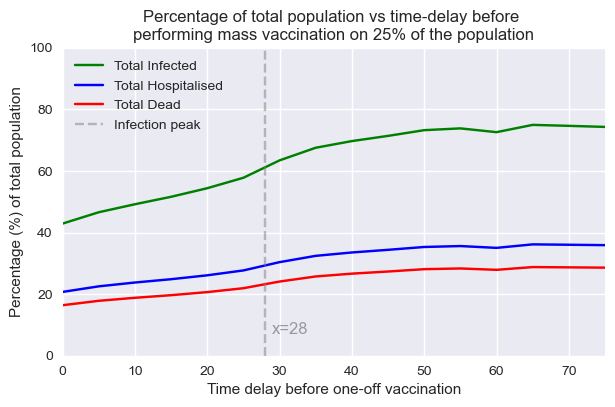

In [101]:
group_visualize(
    ['oneoff_25_1', 'oneoff_25_2', 'oneoff_25_3'], 
    xlabel='Time delay before one-off vaccination', 
    ylabel='Percentage (%) of total population', 
    title=f'Percentage of total population vs time-delay before \nperforming mass vaccination on 25% of the population'
)

# One-off vaccination: 50%

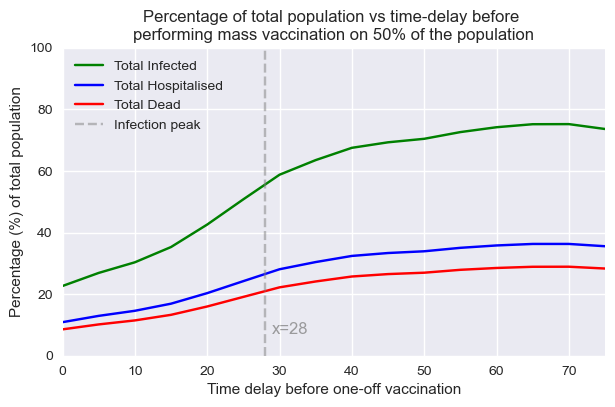

In [102]:
group_visualize(
    ['oneoff_50_1', 'oneoff_50_2', 'oneoff_50_3'], 
    xlabel='Time delay before one-off vaccination', 
    ylabel='Percentage (%) of total population', 
    title=f'Percentage of total population vs time-delay before \nperforming mass vaccination on 50% of the population'
)

# One-off vaccination: 75%

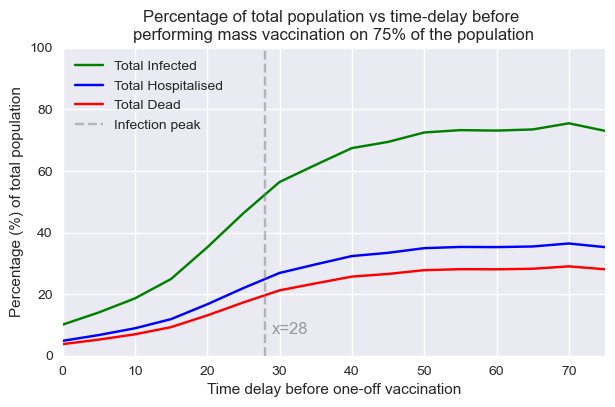

In [103]:
group_visualize(
    ['oneoff_75_1', 'oneoff_75_2', 'oneoff_75_3'], 
    xlabel='Time delay before one-off vaccination', 
    ylabel='Percentage (%) of total population', 
    title=f'Percentage of total population vs time-delay before \nperforming mass vaccination on 75% of the population'
)